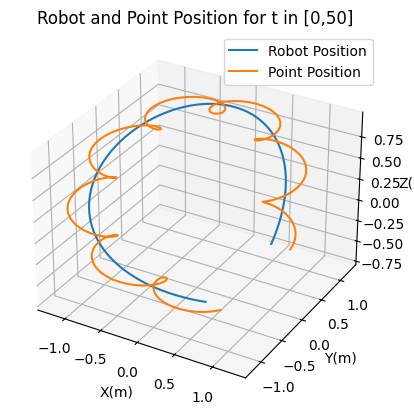

In [105]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
t = np.linspace(0,50,200)
zeros = np.zeros(len(t))
ones = np.ones(len(t))
R = np.array([[np.cos(t), -np.sin(t), zeros],
              [np.sin(t), np.cos(t), zeros],
              [zeros, zeros, ones]])
d = np.array([[np.cos(0.1*t)], 
              [np.sin(0.12*t)], 
              [np.sin(0.08*t)]])

ll_block = np.zeros((1,3,len(t)))
lr_block = np.ones((1,1,len(t)))
R = np.moveaxis(R, -1, 0)
d = np.moveaxis(d, -1, 0)
ll_block = np.moveaxis(ll_block, -1, 0)
lr_block = np.moveaxis(lr_block, -1, 0)

homo = np.block([[R, d],
                 [ll_block, lr_block]])

c = 0.25
dA = np.array([[c*np.cos(t)+np.cos(0.1*t)], 
              [c*np.sin(t)+np.sin(0.12*t)], 
              [np.sin(0.08*t)]])
dA = np.moveaxis(dA, -1, 0)
homoA = np.block([[R, dA],
                 [ll_block, lr_block]])

ax.plot(d[:,0], d[:,1], d[:,2])
ax.plot(dA[:,0], dA[:,1], dA[:,2])
ax.set_xlabel("X(m)")
ax.set_ylabel("Y(m)")
ax.set_zlabel("Z(m)")
ax.set_title("Robot and Point Position for t in [0,50]")
ax.legend(["Robot Position", "Point Position"])
plt.show()

In [20]:
R = np.array([[np.cos(1), -np.sin(1), 0],
              [np.sin(1), np.cos(1), 0],
              [0, 0, 1]])
pb1 = np.array([1.1,0.9,-9.7]).T
pa = R@pb1
print(pa)
R5 = np.array([[np.cos(5), -np.sin(5), 0],
              [np.sin(5), np.cos(5), 0],
              [0, 0, 1]])
pb5 = R5.T@pa
print(pb5)

[-0.16299135  1.41189016 -9.7       ]
[-1.40013023  0.24420349 -9.7       ]


In [85]:
import sympy as sp
import numpy as np
r11,r21,r22,r23,r32,r33 = sp.symbols('r11,r21,r22,r23,r32,r33')
r12,r13,r31 = 0.892,0.423,-0.186
R = sp.Matrix([[r11,r12,r13],
               [r21,r22,r23],
               [r31,r32,r33]])

eqn1 = sp.Eq(R.det(),1)
eqn2 = sp.Eq(R@R.T, sp.eye(3))

solns = sp.solve([eqn1,eqn2],
                 [r11,r21,r22,r23,r32,r33])
i=0
for soln in solns:
    i+=1
    soln_list = [float('%.3f' % n) for n in soln]
    soln_list.insert(1,r12)
    soln_list.insert(2,r13)
    soln_list.insert(-2,r31)
    print("solution{}: ".format(i))
    print(np.array(soln_list).reshape((3,3)))

solution1: 
[[-0.159  0.892  0.423]
 [-0.97  -0.061 -0.237]
 [-0.186 -0.448  0.875]]
solution2: 
[[-0.159  0.892  0.423]
 [ 0.97   0.222 -0.103]
 [-0.186  0.394 -0.9  ]]
solution3: 
[[ 0.159  0.892  0.423]
 [-0.97   0.222 -0.103]
 [-0.186 -0.394  0.9  ]]
solution4: 
[[ 0.159  0.892  0.423]
 [ 0.97  -0.061 -0.237]
 [-0.186  0.448 -0.875]]


In [ ]:
import sympy as sp
import numpy as np
r11,r21,r22,r23,r32,r33 = sp.symbols('r11,r21,r22,r23,r32,r33')
r12,r13,r31 = 0.892,0.423,-0.186
R = sp.Matrix([[r11,r12,r13],
               [r21,r22,r23],
               [r31,r32,r33]])

eqn1 = sp.Eq(R.det(),1)
eqn2 = sp.Eq(r11**2+r21**2+r31**2, 1)
eqn3 = sp.Eq(r12**2+r22**2+r32**2, 1)
eqn4 = sp.Eq(r13**2+r23**2+r33**2, 1)
eqn5 = sp.Eq(r11*r12+r21*r22+r31*r32, 0)
eqn6 = sp.Eq(r11*r13+r21*r23+r31*r33, 0)
eqn7 = sp.Eq(r12*r13+r22*r23+r32*r33, 0)
eqn8 = sp.Eq(R.T@R, sp.eye(3))
# eqn9 = sp.Eq(R@R.T, sp.eye(3))

# solns = sp.solve([eqn1,eqn2,eqn3,eqn4,eqn5,eqn6,eqn7],
#                  [r11,r21,r22,r23,r32,r33])
solns = sp.solve([eqn1,eqn8],
                 [r11,r21,r22,r23,r32,r33])
i=0
for soln in solns:
    i+=1
    soln_list = [float('%.3f' % n) for n in soln]
    soln_list.insert(1,r12)
    soln_list.insert(2,r13)
    soln_list.insert(-2,r31)
    print("solution{}: ".format(i))
    print(np.array(soln_list).reshape((3,3)))

In [ ]:
eqn2 = sp.Eq(r11**2+r21**2+r31**2, 1)